In [2]:
import numpy as np
import argparse
from src.Senstivity import Sensitivity
import copy
import math
from tqdm import tqdm
from src.Util import Permutator

import argparse
def get_args():
    parser = argparse.ArgumentParser(description='Args Sparse Simulation')
    parser.add_argument('--num_feature',type=int,default=100,help='number of feature to simulate') ## only can choose n=100, 300, 600
    parser.add_argument('--p_num', type=int, default=10, help='seed')
    parser.add_argument('--repeat_num',type=int, default=10, help='to see the mean and sd for the p-value after repeated permutation')
    parser.add_argument('--x_grid_start',type=int, default=1,help='start of the x-axis')
    parser.add_argument('--x_grid_end',type=int, default=20,help='end of the x-axis')
    parser.add_argument('--same_ratio',type=int, default=100,help='Same ratio for each group') ## only can choose 10,50, 100 
    parser.add_argument('--interval',type=float,default=0.1,help='interval for x-axis' )
    parser.add_argument('--epsilon',type=float,default=0.0001,help='to_avoid zero division')
    parser.add_argument('--simulated',type=bool,default=True,help='False if you have your own prior knowledge for the absence raito') # if you have your own prior knowledge for the absence ratio set it to False

    parser.add_argument('--predefined',type=bool,default=True,help='False if there is predefined meta analysis') # if you have your own meta analysis for the data result set it to False
    parser.add_argument('--different_sparse_ratio',type=int, default=100, help="Default differnt ratio for sparse simulation problem set it to hundred. ")
    parser.add_argument('--task',type=int,default=1,help='0 for checking sensitivity for the sparsity ratio and 1 for checking sensitivity for various n, k') 
    args, _ = parser.parse_known_args()
    return args

In [4]:
args=get_args()
if args.simulated==True:
    feat_info=np.zeros(args.num_feature)
    feat_info+=1.5 ## by setting feat_info greater than one you do not consider the posterior or prior case.
else:
    feat_info=np.loadtxt("your predefined prior information for each feature.txt") ## need to have your own prior information
simulator=Sensitivity(args)
#simulator.simulate(feat_info)



p1_100,p2_100=simulator.get_group_nk(args.num_feature,args.same_ratio)

#p=Permutator(p1_100,p2_100,feat_info,args)

In [9]:
p1_100

array([[ 9.36535477,  8.06190277,  8.21988852, ...,  8.6013007 ,
        12.92003483,  8.65455725],
       [ 6.371827  ,  4.92759021,  5.25361424, ...,  5.6106984 ,
         7.05064765,  5.3465209 ],
       [ 7.60294869, 14.65461082,  9.83401559, ...,  6.85000048,
         8.20934406,  3.76039521],
       ...,
       [ 1.30904636, 12.45043792, 12.04455563, ..., 10.439058  ,
         5.4146243 ,  6.64869223],
       [ 3.47099246,  2.04457925,  2.77324818, ...,  0.61783429,
         4.90340825,  2.08216025],
       [14.7391198 , 10.8885117 , 10.19193813, ..., 12.00375986,
        10.62817487, 10.33161   ]])

In [39]:
import pandas as pd
a=pd.read_csv("otu.csv")

In [22]:
np.random.dirichlet(a['c'].values,size=1).shape

(1, 233)

In [400]:

a=[1,2,3]
b=[10,20,30]
c=[0.1,0.2,0.3] 

In [401]:
print(np.random.dirichlet(b,size=100).mean(axis=0))
#variance of the dirichlet distribution is alpha_i*(1-alpha_i)/sum(alpha_i)
print(np.random.dirichlet(b,size=100).var(axis=0))


[0.16836482 0.33157265 0.50006253]
[0.00193791 0.00434437 0.00478121]


In [402]:
print(np.random.dirichlet(a,100).mean(axis=0))
print(np.random.dirichlet(a,100).var(axis=0))

[0.15412054 0.35318897 0.49269049]
[0.01601438 0.02671516 0.03151741]


In [403]:
print(np.random.dirichlet(c,100).mean(axis=0))
print(np.random.dirichlet(c,100).var(axis=0))

[0.18695738 0.24921742 0.5638252 ]
[0.08710287 0.13507443 0.15875377]


In [85]:
import pandas as pd
import numpy as np
otu=pd.read_csv("otu.csv")

In [86]:
otu['c']

0       0.133333
1       1.366667
2       9.433333
3       1.083333
4       0.333333
         ...    
228    11.816667
229     0.166667
230     0.233333
231     0.100000
232    62.983333
Name: c, Length: 233, dtype: float64

In [87]:
otu['c']
# drop largest 
otu['c'].drop(otu['c'].idxmax())
# divide by sum of the row
ratio=otu['c']/otu['c'].sum()

In [88]:
ratio

0      0.000090
1      0.000919
2      0.006345
3      0.000729
4      0.000224
         ...   
228    0.007948
229    0.000112
230    0.000157
231    0.000067
232    0.042362
Name: c, Length: 233, dtype: float64

In [89]:
ratio.sum()

np.float64(1.0)

In [90]:
ratio
# please decrease the ratio of the first half by 0.5 and increase the ratio for decreased amount to the second half
decreased=ratio[:int(len(ratio)/2)]-ratio[:int(len(ratio)/2)]*0.5

increased=decreased.sum()/len(ratio[int(len(ratio)/2):])


In [91]:
decreased.sum()

np.float64(0.21310308492511887)

In [92]:
increased

np.float64(0.0018213938882488793)

In [93]:
ratio_first_half=ratio[:int(len(ratio)/2)]-decreased
ratio_second_half=ratio[int(len(ratio)/2):]+increased
ratio_temp=pd.concat([ratio_first_half,ratio_second_half])

In [94]:
ratio_temp.sum()


np.float64(1.0)

In [95]:
# create 100 samples using dirichlet distribution
g1=np.random.dirichlet(otu['c'],size=100)

In [96]:
g2=np.random.dirichlet(ratio_temp*1500,size=100)

In [106]:
vacteriainfo=np.arange(233)
pointwiseentropy_1=-np.log(g1.mean(axis=0))
pointwiseentropy_2=-np.log(g2.mean(axis=0))



In [98]:
mydict1=dict(zip(vacteriainfo,pointwiseentropy_1))
mydict2=dict(zip(vacteriainfo,pointwiseentropy_2))




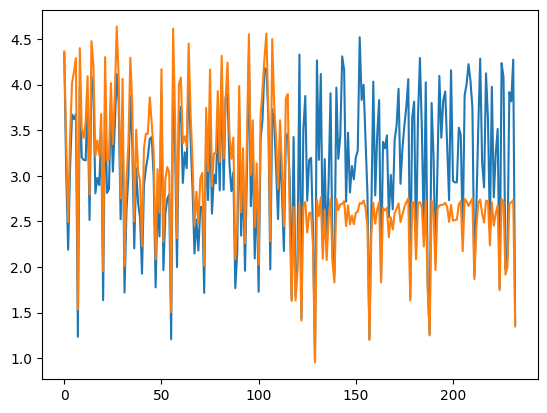

In [99]:
from matplotlib import pyplot as plt
plt.plot(pointwiseentropy_1)
plt.plot(pointwiseentropy_2)

In [100]:
myList1 = sorted(mydict1.items(), key=lambda item: item[1],reverse=True)

In [101]:
# make poinwise entropy 3 which is the average of pointwise entropy 1 and 2
pointwiseentropy_3=(np.array(pointwiseentropy_1)+np.array(pointwiseentropy_2))/2

In [102]:
myList3 = sorted(dict(zip(vacteriainfo,pointwiseentropy_3)).items(), key=lambda item: item[1],reverse=True)

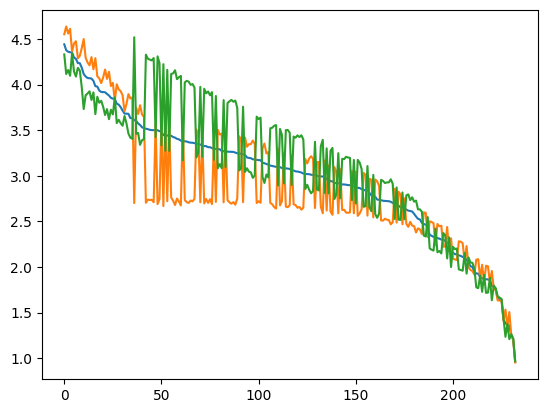

In [103]:
x,y=zip(*myList3)

secondinfo=[]
for i in x:
    secondinfo.append(mydict2[i])

thirdinfo=[]
for i in x:
    thirdinfo.append(mydict1[i])

t1=np.arange(len(x))
plt.plot(t1,y)   
plt.plot(t1,secondinfo)
plt.plot(t1,thirdinfo)

In [104]:
import argparse
parser = argparse.ArgumentParser(description='Args Sparse Simulation')
parser.add_argument('--p_num', type=int, default=10, help='num ber of permutation')
parser.add_argument('--x_grid_start',type=int, default=1,help='start of the x-axis')
parser.add_argument('--x_grid_end',type=int, default=20,help='end of the x-axis')
parser.add_argument('--same_ratio',type=int, default=90,help='Difference ratio for each group') ## only can choose 50,90, 100
parser.add_argument('--interval',type=float,default=0.1,help='interval for x-axis' )
parser.add_argument('--epsilon',type=float,default=0.0001,help='to_avoid zero division')
args, _ = parser.parse_known_args()

In [105]:
pointwiseentropy_1

array([4.34246193, 3.03742679, 2.18921017, 3.09619665, 3.67257766,
       3.62045645, 3.67595403, 1.23353076, 3.97166216, 3.20033546,
       3.17429094, 3.16898871, 3.86609393, 2.51514152, 4.08790241,
       3.92645143, 2.80817293, 2.97697356, 2.89748501, 3.46960854,
       1.63488443, 3.83116052, 2.81168989, 2.85392195, 3.82200699,
       3.04521819, 3.54856183, 4.11576984, 3.80097266, 2.52263803,
       3.7308713 , 1.71881917, 2.61058612, 3.00269072, 3.88303876,
       3.33957763, 2.20332922, 3.08223677, 2.69511296, 2.53835941,
       1.92664473, 2.89323283, 3.08300377, 3.20794844, 3.40536212,
       3.42414713, 2.98163487, 1.77609203, 2.75252335, 2.3339925 ,
       3.91423705, 1.96524649, 2.58007537, 2.74521992, 2.79794963,
       1.20724597, 4.09679027, 3.33407763, 1.99862428, 3.57773176,
       3.75745353, 2.92102856, 3.2569876 , 3.08215118, 4.14377798,
       3.39024408, 2.8501094 , 2.14773511, 2.51919124, 2.1791177 ,
       2.65702078, 2.65904429, 1.71571324, 3.46015846, 2.73347

In [107]:
p1=-np.log(g1)
p2=-np.log(g2)

In [116]:
#change row and column
p1=p1.T
p2=p2.T
feat_info=np.ones((233))
feat_info=feat_info+0.5

In [117]:
feat_info

array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.

In [112]:
import math
import numpy as np
import matplotlib.pylab as plt
from src.Util import Permutator
import time
from tqdm import tqdm
from tqdm import tqdm
pvals=[]
for i in tqdm(range(10)):
    p=Permutator(p1,p2, np.array([feat_info[i]]),args )
    pvals.append(p.permutation())

  0%|          | 0/10 [00:07<?, ?it/s]


IndexError: index 1 is out of bounds for axis 0 with size 1